In [1]:
!git clone https://github.com/frobertpixto/hand-drawn-shapes-dataset.git

Cloning into 'hand-drawn-shapes-dataset'...
remote: Enumerating objects: 48030, done.
remote: Counting objects: 100% (326/326), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 48030 (delta 152), reused 320 (delta 146), pack-reused 47704
Receiving objects: 100% (48030/48030), 87.87 MiB | 13.26 MiB/s, done.
Resolving deltas: 100% (205/205), done.
Updating files: 100% (47333/47333), done.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/hand-drawn-shapes-dataset/data/user.u06/images'):
    for filename in filenames:
        continue
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def image_to_feature_vector(image_path):
    # Đọc ảnh và chuyển đổi thành mảng numpy
    image = Image.open(image_path)
    image_array = np.array(image)
    #print(image_array)
    image_without_alpha = image_array[:, :, :3]
    #print(np.shape(image_without_alpha))


    # Reshape thành vector một chiều
    feature_vector = image_without_alpha.flatten()
    #print(feature_vector)
    # plt.imshow(feature_vector.reshape(70, 70, 3))
    # plt.show()

    return feature_vector

In [4]:
np.shape(image_to_feature_vector('/content/hand-drawn-shapes-dataset/data/user.u06/images/ellipse/ellipse.u06.0002.png'))

(14700,)

In [5]:
label_mapping = {'triangle': 0, 'rectangle': 1, 'ellipse': 2, 'other': 3}

In [6]:
label_mapping['rectangle']

1

In [7]:
def load_image_data(folder_path):
    image_data = []
    labels = []
    for dirname, foldername, filenames in os.walk(folder_path):
        for filename in filenames:
            #print(os.path.join(dirname, filename))
            if filename.endswith(".png"):  # Điều chỉnh đuôi ảnh tương ứng
                image_path = os.path.join(dirname, filename)
                feature_vector = image_to_feature_vector(image_path)
                label = filename.split(".")[0]  # Giả sử nhãn là phần số đầu tiên trong tên file

                #them vao list
                image_data.append(feature_vector)
                labels.append(label_mapping[label])
    return np.array(image_data), np.array(labels)

In [8]:
load_image_data('/content/hand-drawn-shapes-dataset/data/user.u06/images')

(array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Thay thế 'path_to_your_dataset' bằng đường dẫn tới thư mục chứa ảnh của bạn
X, y = load_image_data('/content/hand-drawn-shapes-dataset/data/user.u06/images')

# Tách dữ liệu thành dữ liệu đào tạo và dữ liệu kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và đào tạo mô hình KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred = knn.predict(X_test)

# Hiển thị độ chính xác
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9791666666666666


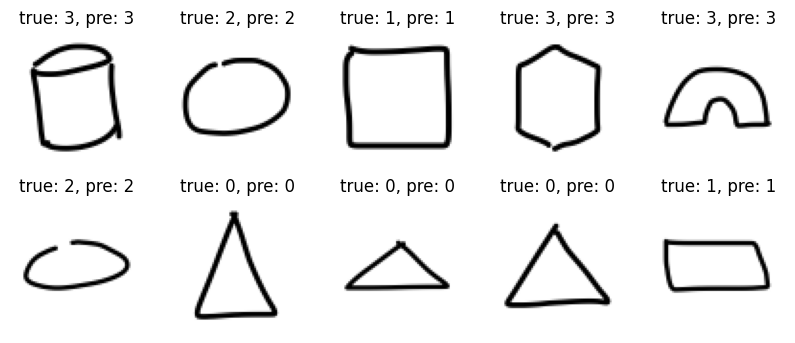

In [10]:
# Hiển thị một số ảnh và dự đoán
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i+20].reshape(70, 70, 3), cmap='gray')
    ax.set_title(f"true: {y_test[i+20]}, pre: {y_pred[i+20]}")
    ax.axis('off')

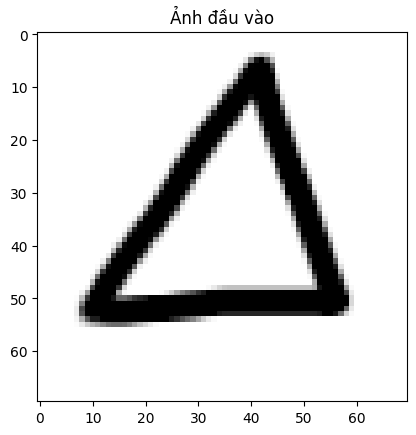

In [11]:
import requests
from io import BytesIO

response = requests.get('https://raw.githubusercontent.com/eggtgg/bt_minhtriho_all/main/computer_vision/test2.png')
img = Image.open(BytesIO(response.content))

plt.imshow(img)
plt.title("Ảnh đầu vào")
plt.show()

In [12]:
image_array = np.array(img)
np.shape(image_array)

(70, 70, 3)

In [13]:
def resize_image(image, new_size=(70, 70)):
    # Thay đổi kích thước ảnh

    resized_image = image.resize(new_size)

    # Chuyển đổi thành mảng numpy
    resized_array = np.array(resized_image)

    resized_array_without_alpha = resized_array[:, :, :3]
    feature_vector = resized_array_without_alpha.flatten()
    return feature_vector

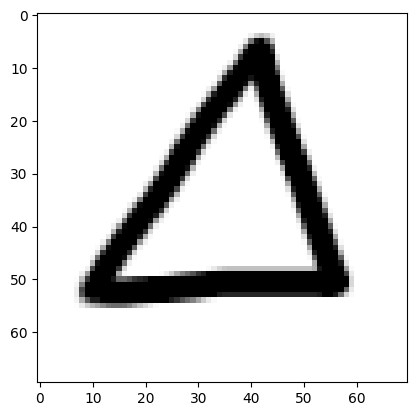

In [14]:
v_img = resize_image(img)
plt.imshow(v_img.reshape(70,70,3))
plt.show()

In [15]:
def pred_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    v_img = resize_image(img)
    return knn.predict([v_img])

In [16]:
pred_url('https://raw.githubusercontent.com/eggtgg/bt_minhtriho_all/main/computer_vision/test2.png')

array([0])

In [17]:
knn.predict([v_img])

array([0])